# Programmatic Data Wrangling - TMDB EDA
#### &nbsp;&nbsp;&nbsp;&nbsp; by Dewi Rhys Chappel


## Contents:

> ### Data Preparation
> ### Basic Data Description
> ### Overview of Dict Types
> ### Analysis of Movies Tagged 'woman director'
> ### Single Observation Analysis
> ### Notes

## Requirements:

> ### 3 Python Visualisations
>> Keywords by Count \
>> Budget vs Revenue by if Tagged 'woman director' \
>> Keywords if Tagged 'woman director'
> ### 2 Keypoints Drawn from Data
>> Mean Revenue vs Mean Budget by 'woman director' Tag \
>> Change in Most Used Keywords by 'woman director' Tag
> ### 2 Movies for Single Observation Analysis
>> Coach Carter \
>> Little Women (1994)


### Data Preparation

In [1]:
# Importing Modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
# Read from TMDB_movies dataset
path = "TMDB_movies.csv"
df = pd.read_csv(path)

In [3]:
# Convert Genres, Keywords, Production Companies, Production Countries & Spoken Languages
df['genres'] = df['genres'].apply(eval)
df['keywords'] = df['keywords'].apply(eval)
df['production_companies'] = df['production_companies'].apply(eval)
df['production_countries'] = df['production_countries'].apply(eval)
df['spoken_languages'] = df['spoken_languages'].apply(eval)

### Basic Description

In [4]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,961000000,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015-10-26,880674609,148.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-07-16,1084939099,165.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-03-07,284139100,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


### Null Analysis

<Axes: >

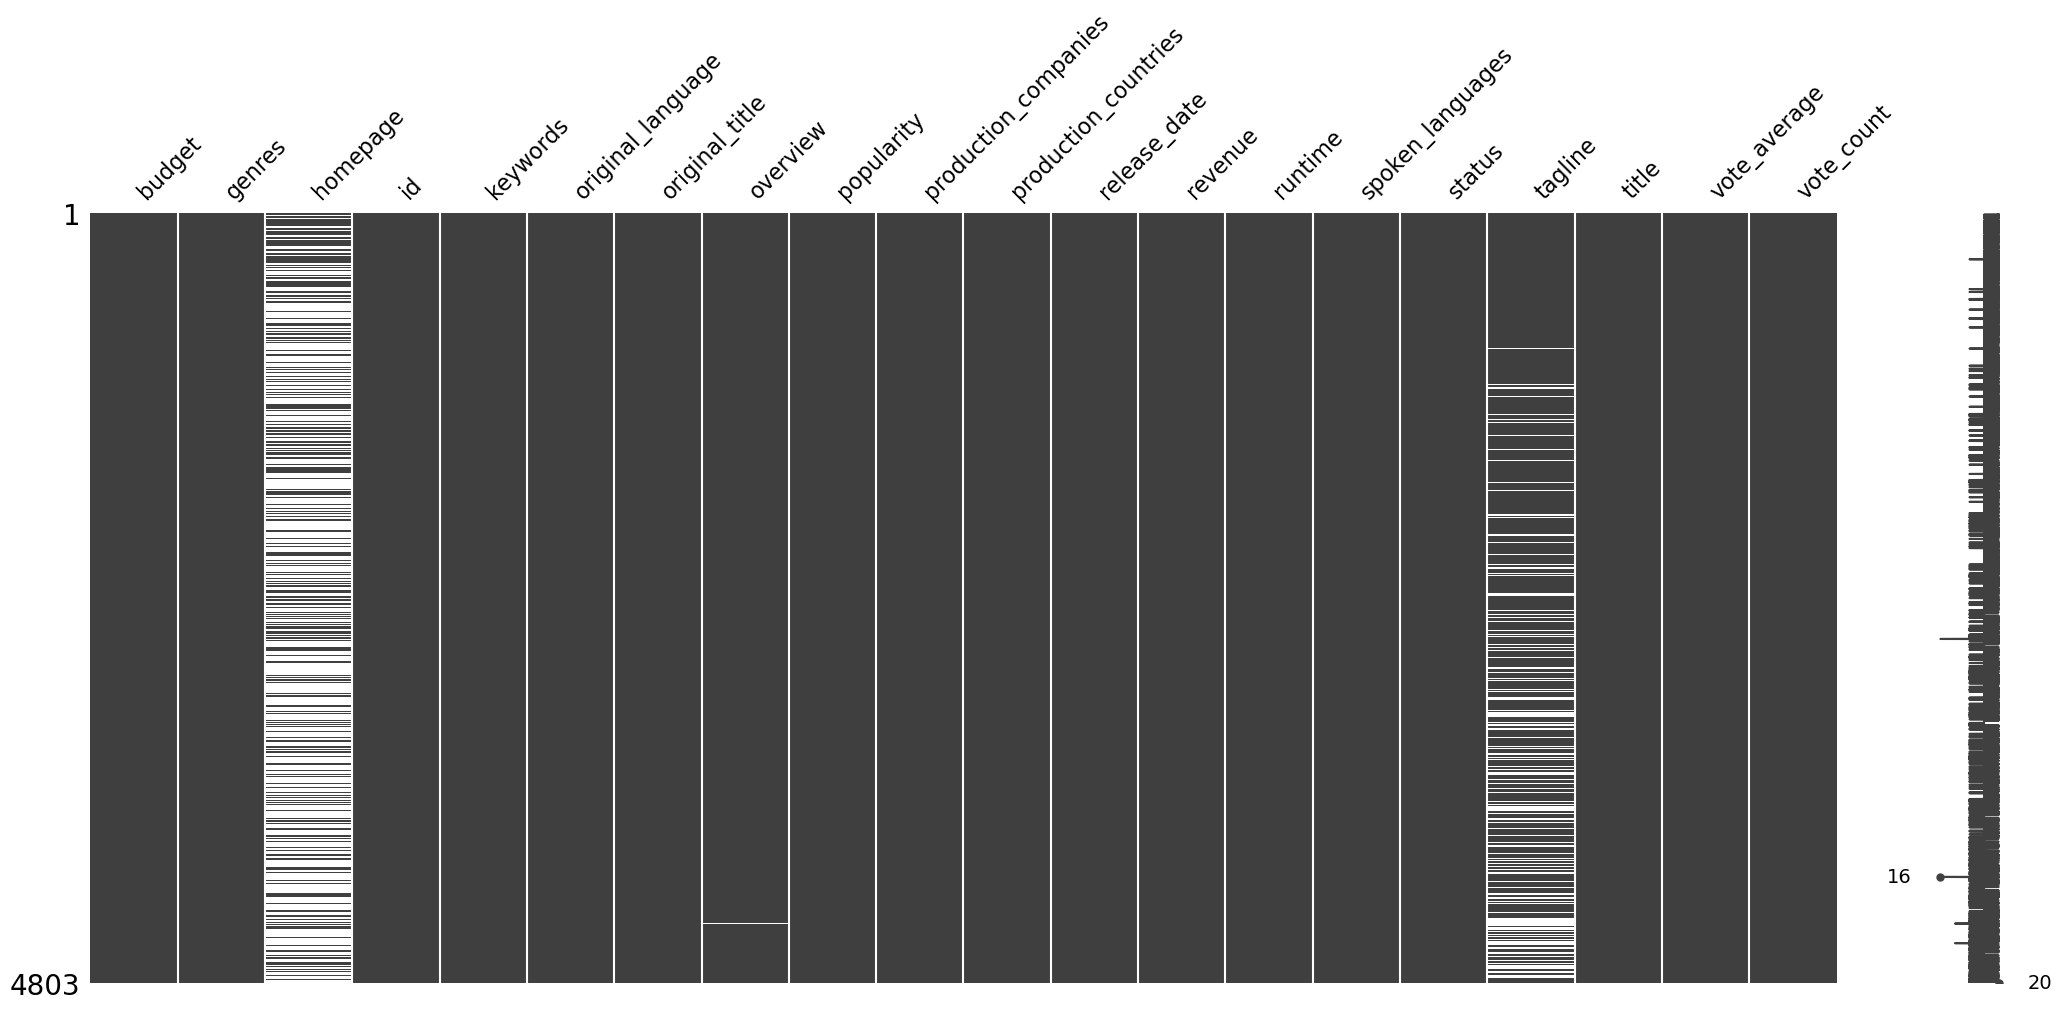

In [6]:
# Shows Missing Data Visually
msno.matrix(df)

In [7]:
# Counts Nulls per Column
null_df = df.isnull() # truth table
null_df.sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

#### Detailed Description of Rows with Null Values on overview, release_date, and runtime

In [8]:
df[df.isnull()['release_date']]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0


In [9]:
df[df.isnull()['runtime']]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2656,15000000,"[{'id': 18, 'name': 'Drama'}]",NaN,370980,"[{'id': 717, 'name': 'pope'}, {'id': 5565, 'na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{'name': 'Taodue Film', 'id': 45724}]","[{'iso_3166_1': 'IT', 'name': 'Italy'}]",2015-12-03,0,NaN,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,"[{'id': 99, 'name': 'Documentary'}]",NaN,459488,"[{'id': 6027, 'name': 'music'}, {'id': 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{'name': 'Eyeline Entertainment', 'id': 60343}]","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",2015-12-12,0,NaN,[],Released,NaN,"To Be Frank, Sinatra at 100",0.0,0


In [10]:
df[df.isnull()['overview']]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2656,15000000,"[{'id': 18, 'name': 'Drama'}]",NaN,370980,"[{'id': 717, 'name': 'pope'}, {'id': 5565, 'na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{'name': 'Taodue Film', 'id': 45724}]","[{'iso_3166_1': 'IT', 'name': 'Italy'}]",2015-12-03,0,NaN,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,"[{'id': 99, 'name': 'Documentary'}]",NaN,459488,"[{'id': 6027, 'name': 'music'}, {'id': 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{'name': 'Eyeline Entertainment', 'id': 60343}]","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",2015-12-12,0,NaN,[],Released,NaN,"To Be Frank, Sinatra at 100",0.0,0
4431,913000,"[{'id': 99, 'name': 'Documentary'}]",NaN,292539,[],de,Food Chains,NaN,0.795698,[],[],2014-04-26,0,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Food Chains,7.4,8


#### Additional Potential Null Data

The first list of movies have an empty list for either Genre, Keywords, Production Company, Production Country or Language
The second list of movies have a value of 0 for a numerical column

Both have the potential to contain true data, as well as are likely to contain null data

In [11]:
df[df.isin([[]]).any(axis=1)]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
71,145000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.themummy.com/,1735,[],en,The Mummy: Tomb of the Dragon Emperor,"Archaeologist Rick O'Connell travels to China,...",60.034162,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",2008-07-01,401128639,112.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A New Evil Awakens.,The Mummy: Tomb of the Dragon Emperor,5.2,1387
83,27000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,79698,[],en,The Lovers,The Lovers is an epic romance time travel adve...,2.418535,"[{'name': 'Corsan', 'id': 7299}, {'name': 'Bli...","[{'iso_3166_1': 'AU', 'name': 'Australia'}, {'...",2015-02-13,0,109.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Love is longer than life.,The Lovers,4.8,34
272,90000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,24113,"[{'id': 2301, 'name': 'architect'}, {'id': 345...",en,Town & Country,Porter Stoddard is a well-known New York archi...,1.004579,"[{'name': 'New Line Cinema', 'id': 12}]",[],2001-04-27,10372291,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,There's no such thing as a small affair.,Town & Country,3.7,16
323,100000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.sexandthecitymovie.com/,37786,[],en,Sex and the City 2,"Carrie, Charlotte, and Miranda are all married...",18.325897,"[{'name': 'New Line Cinema', 'id': 12}, {'name...","[{'iso_3166_1': 'US', 'name': 'United States o...",2010-05-26,288347692,146.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Carrie on.,Sex and the City 2,5.4,426
381,90000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",http://www.nutcrackerin3d.com/,49852,[],en,The Nutcracker: The Untold Story,"Set in 1920's Vienna, this a tale of a little ...",3.593349,"[{'name': 'Vnesheconombank', 'id': 24013}, {'n...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2010-11-24,16178959,110.0,"[{'iso_639_1': 'da', 'name': 'Dansk'}, {'iso_6...",Released,NaN,The Nutcracker: The Untold Story,5.4,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4793,0,"[{'id': 18, 'name': 'Drama'}]",NaN,182291,"[{'id': 718, 'name': 'confession'}, {'id': 100...",en,On The Downlow,Isaac and Angel are two young Latinos involved...,0.029757,"[{'name': 'Iconoclast Films', 'id': 26677}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2004-04-11,0,90.0,[],Released,Two gangs. One secret. One crossroad.,On The Downlow,6.0,2
4794,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",NaN,286939,[],en,Sanctuary: Quite a Conundrum,"It should have been just a normal day of sex, ...",0.166513,"[{'name': 'Gold Lion Films', 'id': 37870}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-01-20,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Sanctuary: Quite a Conundrum,0.0,0
4797,0,"[{'id': 10769, 'name': 'Foreign'}, {'id': 53, ...",NaN,67238,[],en,Cavite,"Adam, a security guard, travels from Californi...",0.022173,[],[],2005-03-12,0,80.0,[],Released,NaN,Cavite,7.5,2
4799,9000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5


In [12]:
df[df.isin([0]).any(axis=1)]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
83,27000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,79698,[],en,The Lovers,The Lovers is an epic romance time travel adve...,2.418535,"[{'name': 'Corsan', 'id': 7299}, {'name': 'Bli...","[{'iso_3166_1': 'AU', 'name': 'Australia'}, {'...",2015-02-13,0,109.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Love is longer than life.,The Lovers,4.8,34
135,150000000,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",http://www.thewolfmanmovie.com/,7978,"[{'id': 494, 'name': 'father son relationship'...",en,The Wolfman,"Lawrence Talbot, an American man on a visit to...",21.214571,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",2010-02-11,0,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,When the moon is full the legend comes to life,The Wolfman,5.5,549
265,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 14, 'nam...",NaN,10588,"[{'id': 977, 'name': 'cat'}, {'id': 1155, 'nam...",en,The Cat in the Hat,Conrad and Sally Walden are home alone with th...,18.251129,"[{'name': 'Imagine Entertainment', 'id': 23}, ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-11-21,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Don't mess with the hat.,The Cat in the Hat,4.9,366
309,84000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 35, 'na...",NaN,10214,"[{'id': 1009, 'name': 'baby'}, {'id': 2546, 'n...",en,Son of the Mask,"Tim Avery, an aspiring cartoonist, finds himse...",17.815595,"[{'name': 'New Line Cinema', 'id': 12}, {'name...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",2005-02-18,0,94.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Who's next?,Son of the Mask,3.6,338
321,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,77953,"[{'id': 6078, 'name': 'politics'}, {'id': 6083...",en,The Campaign,Two rival politicians compete to win an electi...,16.460356,"[{'name': 'Everyman Pictures', 'id': 2242}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-08-09,104907746,85.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,May The Best Loser Win.,The Campaign,5.6,578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,0,"[{'id': 10769, 'name': 'Foreign'}, {'id': 53, ...",NaN,67238,[],en,Cavite,"Adam, a security guard, travels from Californi...",0.022173,[],[],2005-03-12,0,80.0,[],Released,NaN,Cavite,7.5,2
4799,9000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{'id': 248, 'name': 'date'}, {'id': 699, 'nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{'name': 'Front Street Pictures', 'id': 3958}...","[{'iso_3166_1': 'US', 'name': 'United States o...",2013-10-13,0,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2012-05-03,0,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7


### Overview of Dict Types
#### Genres, Spoken Languages, Keywords, Production Countries and Production Companies

Showing:
> Total Count \
> Total Unique Count \
> Graph by Frequency

#### Necessary Functions

In [13]:
# Merges a Column of Lists of Dicts into one List of Dicts
def merge_dict_column(df_column):
    holder_dict = []
    for i in df_column:
        for j in i:
            holder_dict.append(j)
    return holder_dict

In [14]:
# Converts any List into a list of only the Unique Values
def unique_list(lst):
    newset = set([])
    for i in lst:
        newset.add(str(i))
    return list(newset)

In [15]:
# Converts a List of Strings into a List of Dicts
def str_to_dict_list(lst):
    newlist = lst
    for i in range(len(lst)):
        newlist[i] = eval(lst[i])
    return newlist

In [16]:
# Converts a List of Dicts into a List of one element of the Dict
def list_of_dict_col(lst, name):
    newlist = []
    for i in lst:
        newlist.append(i.get(name))
    return newlist

In [17]:
# Removes Empty Strings from a List
def remove_empty_strings(lst):
    newlist = []
    for i in lst:
        if i != '':
            newlist.append(i)
    return newlist

In [18]:
# Gives out a DataFrame within a Column of Lists of Dictionaries
def column_to_list_and_unique(col, id, name, idname = False):
    if idname:
        nameBy = id
    else:
        nameBy = name
    
    col_list = merge_dict_column(col)
    col_names = list_of_dict_col(col_list, nameBy)
    
    col_unique = str_to_dict_list(unique_list(col_list))
    col_unique_names = list_of_dict_col(col_unique, nameBy)
    
    col_df = pd.DataFrame({'id' : list_of_dict_col(col_list, id), 'name' : list_of_dict_col(col_list, name)})
    
    return col_names, col_unique_names, col_df

In [19]:
# Returns a Truth Table on whether a value is in a List of Dictionaries in a Ggiven Column
def if_dict_contains_on(lst, cont, ont, col):
    holder = []
    for i in df['keywords']:
        boolholder = False
        for dct in i:
            if dct.get(ont) == cont:
                boolholder = True
        holder.append(boolholder)
    return holder

#### Genre

In [20]:
genre_names, genre_unique_names, genre_df = column_to_list_and_unique(df['genres'], 'id', 'name')

sorted(genre_unique_names)

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western']

In [21]:
len(genre_names)

12160

In [22]:
len(genre_unique_names)

20

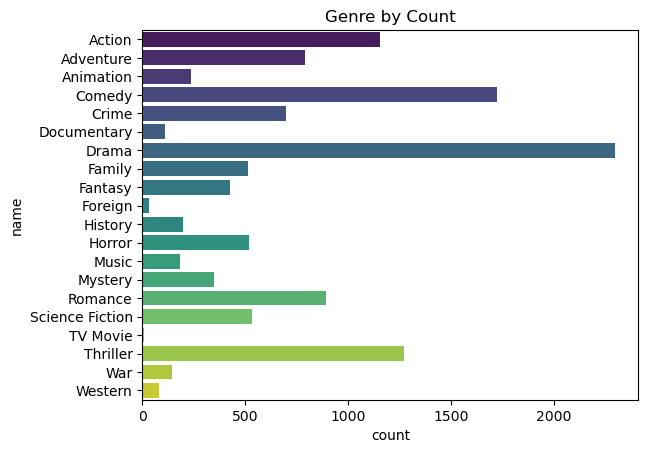

In [23]:
sns.countplot(data = genre_df,
              y = 'name',
              palette = 'viridis',
              order = sorted(genre_unique_names)).set_title("Genre by Count")
plt.show()

#### Spoken Language

In [24]:
language_names, language_unique_names, language_df = column_to_list_and_unique(df['spoken_languages'], 'iso_639_1', 'name', True)

## sorted(remove_empty_strings(language_unique_names))

In [25]:
len(language_unique_names)

87

In [26]:
len(language_names)

6937

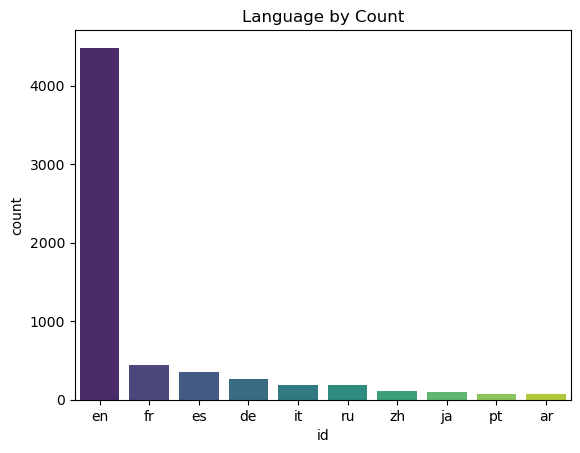

In [27]:
sns.countplot(data = language_df,
              x = 'id',
              palette = 'viridis',
              order = language_df.id.value_counts().iloc[:10].index).set_title("Language by Count")
plt.show()

#### Keywords

In [28]:
keyword_names, keyword_unique_names, keyword_df = column_to_list_and_unique(df['keywords'], 'id', 'name')

## sorted(keyword_unique_names)

In [29]:
len(keyword_names)

36194

In [30]:
len(keyword_unique_names)

9813

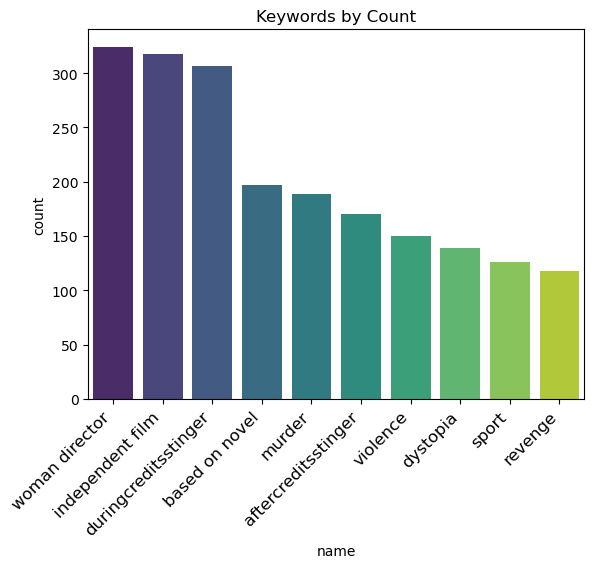

In [31]:
sns.countplot(data = keyword_df,
              x = 'name',
              palette = 'viridis',
              order = keyword_df.name.value_counts().iloc[:10].index).set_title("Keywords by Count")

plt.xticks(rotation = 45,
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 'large',
          )
plt.show()

Stinger Definition: https://en.wikipedia.org/wiki/Post-credits_scene#:~:text=A%20post%2Dcredits%20scene%20

#### Production Country

In [32]:
pdcountry_names, pdcountry_unique_names, pdcountry_df = column_to_list_and_unique(df['production_countries'], 'iso_3166_1', 'name')

## sorted(pdcountry_unique_names)

In [33]:
len(pdcountry_names)

6436

In [34]:
len(pdcountry_unique_names)

88

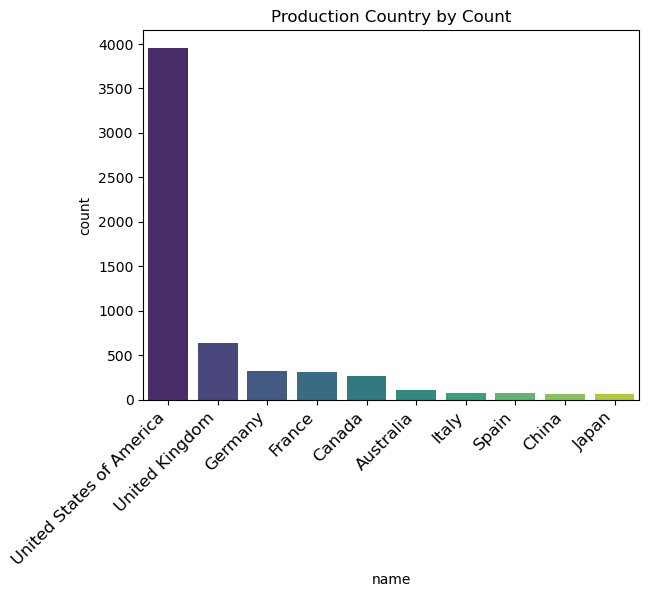

In [35]:
sns.countplot(data = pdcountry_df,
              x = 'name',
              palette = 'viridis',
              order = pdcountry_df.name.value_counts().iloc[:10].index).set_title("Production Country by Count")

plt.xticks(rotation = 45,
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 'large',
          )
plt.show()

#### Production Company

In [36]:
pdcompany_names, pdcompany_unique_names, pdcompany_df = column_to_list_and_unique(df['production_companies'], 'id', 'name')

## sorted(pdcompany_unique_names)

In [37]:
len(pdcompany_names)

13677

In [38]:
len(pdcompany_unique_names)

5047

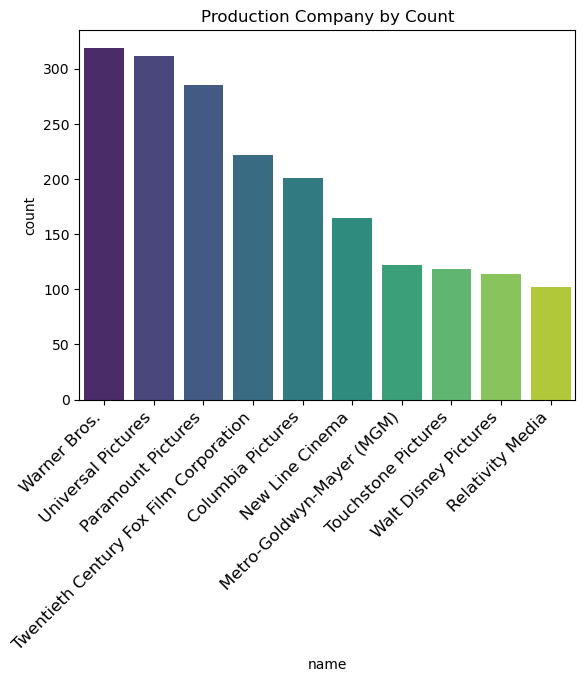

In [39]:
sns.countplot(data = pdcompany_df,
              x = 'name',
              palette = 'viridis',
              order = pdcompany_df.name.value_counts().iloc[:10].index).set_title("Production Company by Count")

plt.xticks(rotation = 45,
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 'large',
          )
plt.show()

### Analysis of Movies Tagged 'woman director'


Includes:
> Count of Unique \
> Percentage with At Least One \
> Plot of Most Common \
> Plot of Percentage Woman Directed

#### Necessary Setup

In [40]:
# Masking by those tagged 'woman director' and those not tagged as such

df_keyword_mask = if_dict_contains_on(df['keywords'], 'woman director', 'name', 'keywords')
df_inverse_mask = [not bl for bl in df_keyword_mask]

womanDirectors = df[df_keyword_mask]
manDirectors = df[df_inverse_mask]

len(womanDirectors) # Number of Movies tagged 'woman_director'

324

In [41]:
def percentage_wd_count_by_dict(names_wd, names):
    newdata_wdf = pd.DataFrame({'Name' : names_wd})
    newdata_wdf = newdata_wdf.groupby(['Name']).size().to_frame()

    newdata_adf = pd.DataFrame({'Name' : names})
    newdata_adf = newdata_adf.groupby(['Name']).size().to_frame()

    newdata_df = pd.concat([newdata_wdf,newdata_adf], axis = 1, join="inner").reset_index()
    newdata_df.columns = ['Name', 'Woman Director Count', 'Total Count']
    newdata_df['Percentage Woman Directed'] = round(100 * newdata_df['Woman Director Count'] / newdata_df['Total Count'],2)
    return newdata_df

#### General Analysis

In [42]:
womanDirectors['budget'].mean()

17129529.469135802

In [43]:
womanDirectors['revenue'].mean()/womanDirectors['budget'].mean()

2.908201780714268

In [44]:
manDirectors['budget'].mean()

29906979.00714445

In [45]:
manDirectors['revenue'].mean()/manDirectors['budget'].mean()

2.829025153556498

**Key Point 1** \
\
According to these above statistics, movies tagged 'woman director' tend to have a higher percentage return of their given budget, despite on average receiving smaller budgets. \
\
This, however, doesn't fully take into consideration the null or incorrect data within the table. To properly confirm this Key Point the following graphs have been created

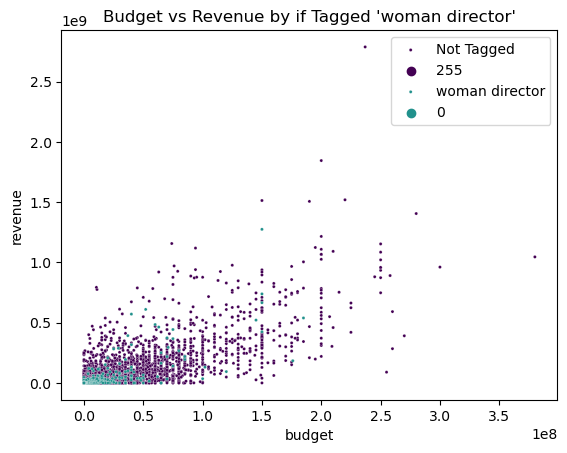

In [46]:
sns.scatterplot(x = manDirectors['budget'],
        y = manDirectors['revenue'],
        hue = 255,
        palette = 'viridis',
        s = 5, 
        label = 'Not Tagged'
        )

sns.scatterplot(x = womanDirectors['budget'],
        y = womanDirectors['revenue'],
        hue = 0,
        palette = 'viridis',
        s = 5, 
        label = 'woman director'
        ).set_title("Budget vs Revenue by if Tagged 'woman director'")
plt.show()

# 255 is Not Tagged, 0 is tagged as 'woman director'

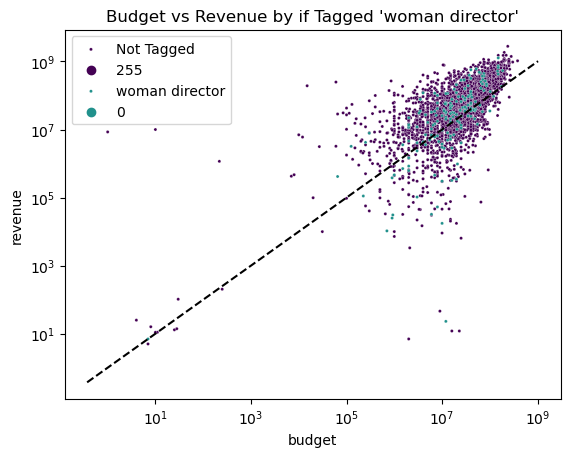

In [47]:
sns.scatterplot(x = manDirectors['budget'],
        y = manDirectors['revenue'],
        hue = 255,
        palette = 'viridis',
        s = 5, 
        label = 'Not Tagged'
        )

sns.scatterplot(x = womanDirectors['budget'],
        y = womanDirectors['revenue'],
        hue = 0,
        palette = 'viridis',
        s = 5, 
        label = 'woman director'
        ).set_title("Budget vs Revenue by if Tagged 'woman director'")

ax = plt.gca() # Get Current Axes
ax.set(xscale="log", yscale="log")

xp = yp = ax.get_xlim()
ax.plot(xp, yp, linestyle='--', color='k')

plt.show()

This Log-Log graph doesn't include Movies with a Budget or Revenue of 0 - Often Anomylous Data 
\
The black dashed line is an 'x = y' line

#### Genre

In [48]:
genre_names_wd, genre_unique_names_wd, genre_df_wd = column_to_list_and_unique(womanDirectors['genres'], 'id', 'name')

len(genre_unique_names_wd) # Number of Keywords with a movie tagged 'woman_director'

19

In [49]:
# Percentage of Keywords with a movie tagged 'woman_director'
round(100 * len(genre_unique_names_wd)/len(genre_unique_names),2) 

95.0

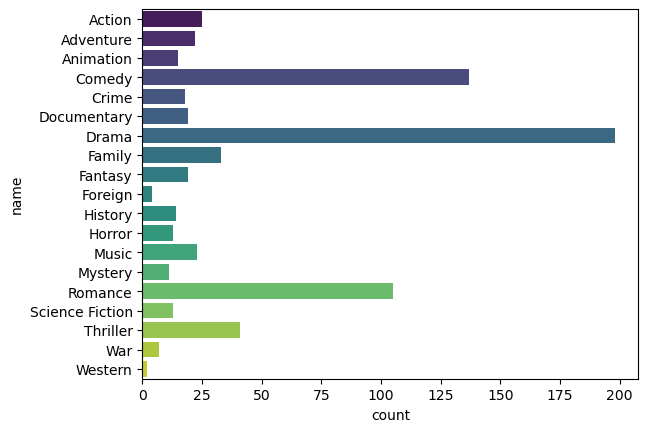

In [50]:
sns.countplot(data = genre_df_wd,
              y = 'name',
              palette = 'viridis',
              order = sorted(genre_unique_names_wd))
plt.show()

In [51]:
newdata_genre_df = percentage_wd_count_by_dict(genre_names_wd, genre_names)

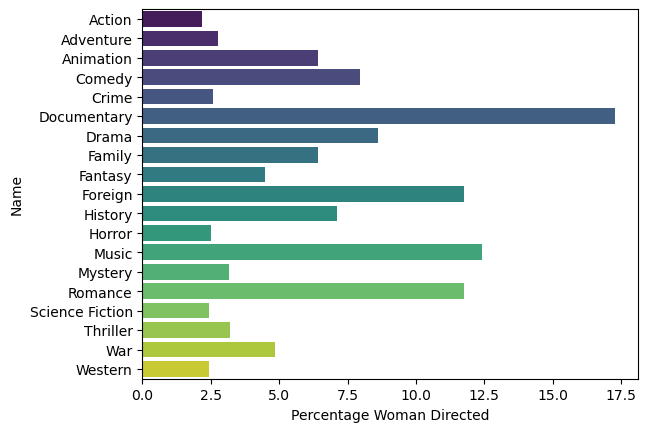

In [52]:
sns.barplot(data = newdata_genre_df,
              x = 'Percentage Woman Directed',
              y = 'Name',
              palette = 'viridis')
plt.show()

#### Spoken Language

In [53]:
language_names_wd, language_unique_names_wd, language_df_wd = column_to_list_and_unique(womanDirectors['spoken_languages'], 'iso_639_1', 'name', True)

len(language_unique_names_wd) # Number of Keywords with a movie tagged 'woman_director'

32

In [54]:
# Percentage of Keywords with a movie tagged 'woman_director'
round(100 * len(language_unique_names_wd)/len(language_unique_names),2)

36.78

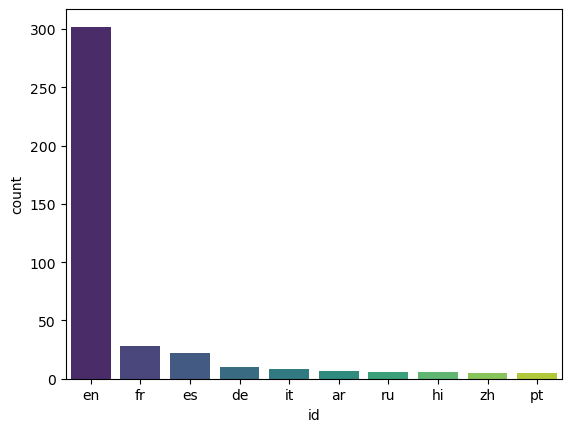

In [55]:
sns.countplot(data = language_df_wd,
              x = 'id',
              palette = 'viridis',
              order = language_df_wd.id.value_counts().iloc[:10].index)
plt.show()

In [56]:
newdata_language_df = percentage_wd_count_by_dict(language_names_wd, language_names)

newdata_language_df = newdata_language_df.sort_values('Percentage Woman Directed', ascending = False).head(20)

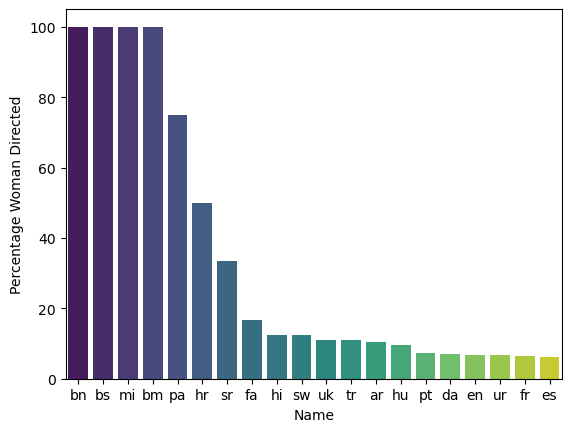

In [57]:
sns.barplot(data = newdata_language_df,
              x = 'Name',
              y = 'Percentage Woman Directed',
              palette = 'viridis')
plt.show()

#### Keywords

In [58]:
keyword_names_wd, keyword_unique_names_wd, keyword_df_wd = column_to_list_and_unique(womanDirectors['keywords'], 'id', 'name')

len(keyword_unique_names_wd) # Number of Keywords with a movie tagged 'woman_director'

1400

In [59]:
# Percentage of Keywords with a movie tagged 'woman_director'
round(100 * len(keyword_unique_names_wd)/len(keyword_unique_names),2) 

14.27

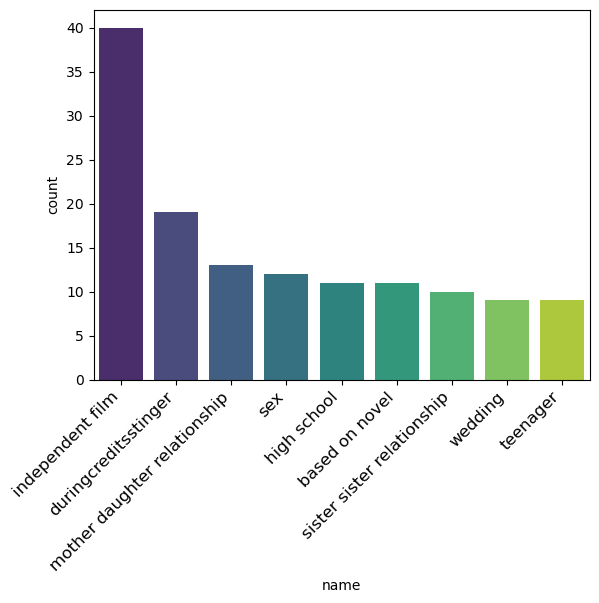

In [60]:
sns.countplot(data = keyword_df_wd,
              x = 'name',
              palette = 'viridis',
              order = keyword_df_wd.name.value_counts().iloc[1:10].index)

plt.xticks(rotation = 45,
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 'large',
          )
plt.show()

**Key Point 2**\
\
Comparing this graph to the most popular keywords for all movies, there is a clear relative focus on female relationships as opposed to violence. \
\
A similar effect is shown when keywords are ranked by percentage of movies with the 'woman director' tag

In [61]:
newdata_keyword_df = percentage_wd_count_by_dict(keyword_names_wd, keyword_names)

newdata_keyword_df = newdata_keyword_df.sort_values('Percentage Woman Directed', ascending = False)
newdata_keyword_df = newdata_keyword_df[newdata_keyword_df['Percentage Woman Directed'] < 100].head(20) # Removes 100% Keywords - Often only One Movie

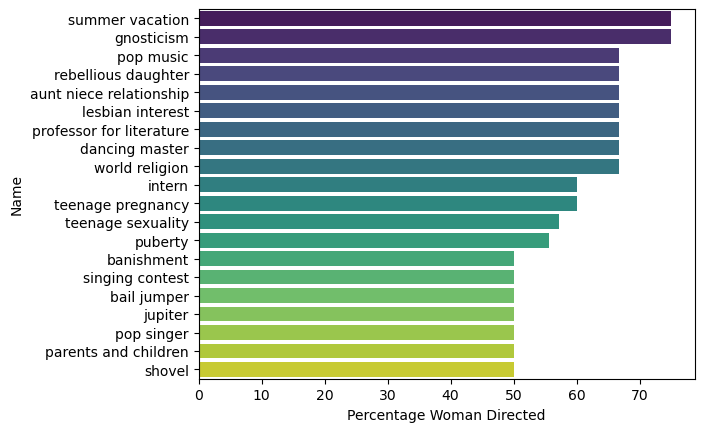

In [62]:
sns.barplot(data = newdata_keyword_df,
              x = 'Percentage Woman Directed',
              y = 'Name',
              palette = 'viridis')
plt.show()

##### Additional Insights

In [63]:
# Keywords only used alongside 'woman director'
newdata_keyword_df = percentage_wd_count_by_dict(keyword_names_wd, keyword_names)

newdata_keyword_df = newdata_keyword_df.sort_values('Percentage Woman Directed', ascending = False)
newdata_keyword_df = newdata_keyword_df[newdata_keyword_df['Percentage Woman Directed'] == 100]
newdata_keyword_df = newdata_keyword_df[newdata_keyword_df['Total Count'] > 1]
newdata_keyword_df

,Name,Woman Director Count,Total Count,Percentage Woman Directed
760,marriage problems,2,2,100.0
784,milan,2,2,100.0
781,michigan,2,2,100.0
1304,unexpected happiness,2,2,100.0
443,fake boyfriend,2,2,100.0
1382,woman director,324,324,100.0
97,baltimore,2,2,100.0
961,precognition,2,2,100.0
34,alcoholic drink,2,2,100.0


In [64]:
# Keywords evenly split between 'woman director' and not tagged
newdata_keyword_df = percentage_wd_count_by_dict(keyword_names_wd, keyword_names)

newdata_keyword_df = newdata_keyword_df.sort_values('Percentage Woman Directed', ascending = False)
newdata_keyword_df = newdata_keyword_df[newdata_keyword_df['Percentage Woman Directed'] == 50]
newdata_keyword_df = newdata_keyword_df[newdata_keyword_df['Total Count'] > 2]
newdata_keyword_df

,Name,Woman Director Count,Total Count,Percentage Woman Directed
660,karaoke,2,4,50.0
627,insult,2,4,50.0
38,alternate dimension,2,4,50.0
527,girl,2,4,50.0
610,immigration,3,6,50.0
60,argument,2,4,50.0
893,panda,2,4,50.0
855,new zealand,2,4,50.0
155,blog,2,4,50.0
845,new age,2,4,50.0


In [65]:
# Keywords never used alongside 'woman director'
newdata_keyword_wdf = pd.DataFrame({'Name' : keyword_names_wd})
newdata_keyword_wdf = newdata_keyword_wdf.groupby(['Name']).size().to_frame()

newdata_keyword_adf = pd.DataFrame({'Name' : keyword_names})
newdata_keyword_adf = newdata_keyword_adf.groupby(['Name']).size().to_frame()

newdata_keyword_df = pd.concat([newdata_keyword_adf,newdata_keyword_wdf], axis = 1).reset_index()

newdata_keyword_df.columns = ['Name', 'Total Count', 'Woman Director Count']

newdata_keyword_df = newdata_keyword_df[newdata_keyword_df['Woman Director Count'].isnull()]
newdata_keyword_df = newdata_keyword_df.sort_values('Total Count', ascending = False)
newdata_keyword_df = newdata_keyword_df[newdata_keyword_df['Total Count'] > 20]

newdata_keyword_df

,Name,Total Count,Woman Director Count
150,alien,76,NaN
4486,investigation,50,NaN
3149,fbi,49,NaN
3559,gay,46,NaN
9795,zombie,45,NaN
9218,undercover,44,NaN
453,assassin,42,NaN
2281,death,42,NaN
4652,journalist,41,NaN
7387,robbery,40,NaN


#### Production Country

In [66]:
pdcountry_names_wd, pdcountry_unique_names_wd, pdcountry_df_wd = column_to_list_and_unique(womanDirectors['production_countries'], 'iso_3166_1', 'name')

len(pdcountry_unique_names_wd) # Number of Countries with a movie tagged 'woman_director'

34

In [67]:
# Percentage of Countries with a movie tagged 'woman_director'
round(100 * len(pdcountry_unique_names_wd)/len(pdcountry_unique_names),2) 

38.64

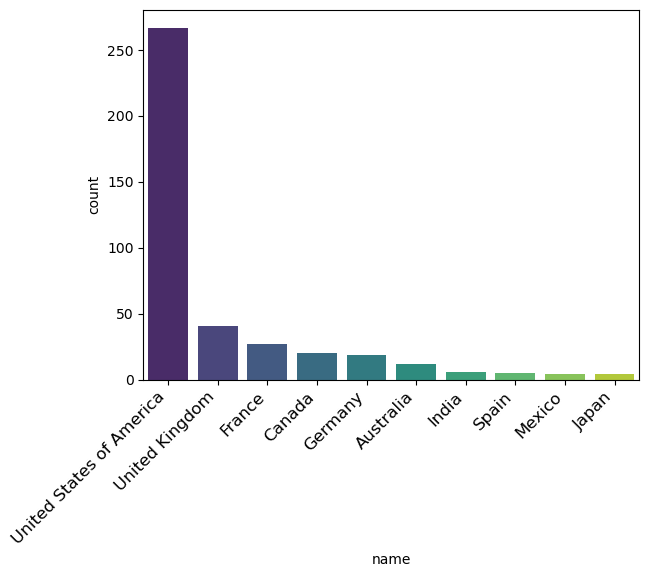

In [68]:
sns.countplot(data = pdcountry_df_wd,
              x = 'name',
              palette = 'viridis',
              order = pdcountry_df_wd.name.value_counts().iloc[:10].index)

plt.xticks(rotation = 45,
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 'large',
          )
plt.show()

In [69]:
newdata_pdcountry_df = percentage_wd_count_by_dict(pdcountry_names_wd, pdcountry_names)

newdata_pdcountry_df = newdata_pdcountry_df.sort_values('Percentage Woman Directed', ascending = False).head(20)

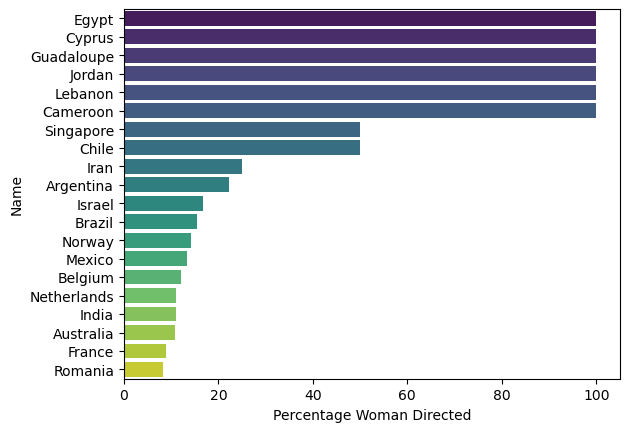

In [70]:
sns.barplot(data = newdata_pdcountry_df,
              x = 'Percentage Woman Directed',
              y = 'Name',
              palette = 'viridis')
plt.show()

#### Production Company

In [71]:
pdcompany_names_wd, pdcompany_unique_names_wd, pdcompany_df_wd = column_to_list_and_unique(womanDirectors['production_companies'], 'id', 'name')

len(pdcompany_unique_names_wd) # Number of Production Companies with a movie tagged 'woman_director'

587

In [72]:
# Percentage of Production Companies with a movie tagged 'woman_director'
round(100 * len(pdcompany_unique_names_wd)/len(pdcompany_unique_names),2) 

11.63

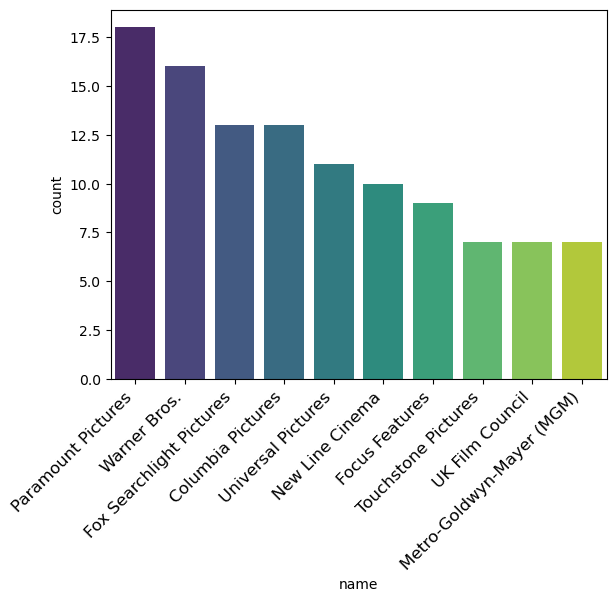

In [73]:
sns.countplot(data = pdcompany_df_wd,
              x = 'name',
              palette = 'viridis',
              order = pdcompany_df_wd.name.value_counts().iloc[:10].index)

plt.xticks(rotation = 45,
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 'large',
          )
plt.show()

In [74]:
newdata_pdcompany_df = percentage_wd_count_by_dict(pdcompany_names_wd, pdcompany_names)

newdata_pdcompany_df = newdata_pdcompany_df.sort_values('Percentage Woman Directed', ascending = False)
newdata_pdcompany_df = newdata_pdcompany_df[newdata_pdcompany_df['Percentage Woman Directed'] < 100].head(20) # Removes 100% Keywords - Often only One Director

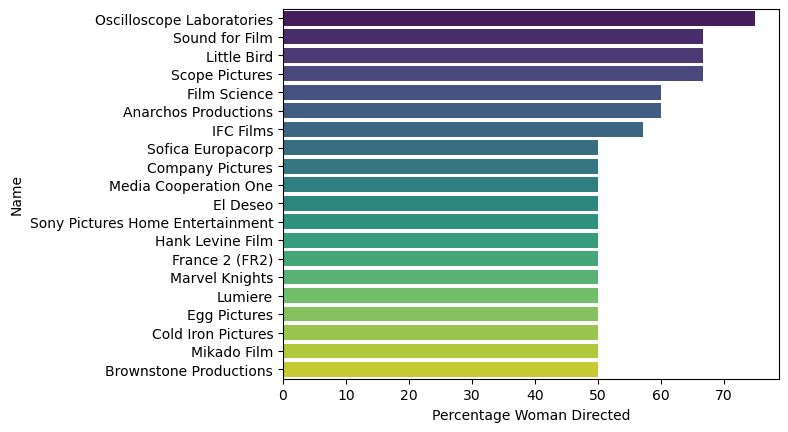

In [75]:
sns.barplot(data = newdata_pdcompany_df,
              x = 'Percentage Woman Directed',
              y = 'Name',
              palette = 'viridis')
plt.show()

### Single Observation Analysis

Typical Example of a 'woman director' Movie vs a Movie Not Tagged as such \
\
Chosen to have Close to the Mean Budget & Revenue, as well as Typical Tags

#### Little Women (1994)

In [76]:
LittleWomen = df[df['id'] == 9587]
LittleWomen

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2532,18000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,9587,"[{'id': 894, 'name': 'depression'}, {'id': 107...",en,Little Women,With their father away as a chaplain in the Ci...,16.418639,"[{'name': 'Columbia Pictures', 'id': 5}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1994-12-21,0,115.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The story that has lived in our hearts for gen...,Little Women,7.0,215


According to https://www.the-numbers.com/movie/Little-Women-(1994)#tab=summary
Little Women should have a Revenue of: \
 $50,003,303 \
Which is 'tyical' for a movie of its size

In [77]:
for i in LittleWomen['genres']:
    for j in i:
        print(j.get('name'))

Drama
Romance


In [78]:
for i in LittleWomen['keywords']:
    for j in i:
        print(j.get('name'))

depression
mother daughter relationship
pregnant
desire
chalkboard
 nightgown
louisa may alcott
birth of twins
woman director


#### Coach Carter

In [79]:
CoachCarter = df[df['id'] == 7214]
CoachCarter

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1057,30000000,"[{'id': 18, 'name': 'Drama'}]",NaN,7214,"[{'id': 577, 'name': 'black people'}, {'id': 5...",en,Coach Carter,"Based on a true story, in which Richmond High ...",23.234651,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",2005-01-14,76669806,136.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It begins on the street. It ends here.,Coach Carter,7.3,496


In [80]:
for i in CoachCarter['keywords']:
    for j in i:
        print(j.get('name'))

black people
autoritian education
sport
high school
scholarship
basketball
violence in schools
teacher
teachers and students


### Notes

#### Additional Tag Checking

In [81]:
# Masking by those tagged given_Tag and those not tagged as such

# Good Options:
# pokémon
# minions
# society for the prevention of cruelty to animals

given_Tag = 'pokémon'

df_keyword_mask_tag = if_dict_contains_on(df['keywords'], given_Tag, 'name', 'keywords')
df_inverse_mask_tag = [not bl for bl in df_keyword_mask_tag]

Tagged = df[df_keyword_mask_tag]

Tagged # Movies tagged as given_Tag

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3901,16000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://movies.warnerbros.com/pk3/,10991,"[{'id': 1262, 'name': 'mountains'}, {'id': 280...",ja,Pokémon 3: The Movie,When Molly Hale's sadness of her father's disa...,9.18885,"[{'name': 'TV Tokyo', 'id': 3034}, {'name': '4...","[{'iso_3166_1': 'JP', 'name': 'Japan'}]",2000-07-08,68411275,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pokémon: Spell of the Unknown,Pokémon: Spell of the Unknown,5.9,137
